<a href="https://colab.research.google.com/github/danschoonover/CryptoCompetitonSimulator/blob/main/simComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 2 competitors,  total prize pool = $ 20
payouts =$[20. -0.]
1st place = $20.00 , last place = $-0.00


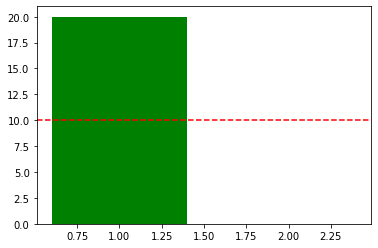

 3 competitors,  total prize pool = $ 30
payouts =$[20. 10. -0.]
1st place = $20.00 , last place = $-0.00


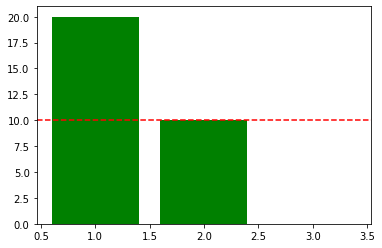

 4 competitors,  total prize pool = $ 40
payouts =$[19.2  9.6  6.4  4.8]
1st place = $19.20 , last place = $4.80


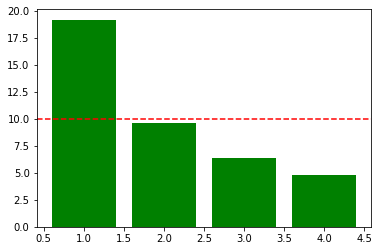

 5 competitors,  total prize pool = $ 50
payouts =$[21.9  10.95  7.3   5.47  4.38]
1st place = $21.90 , last place = $4.38


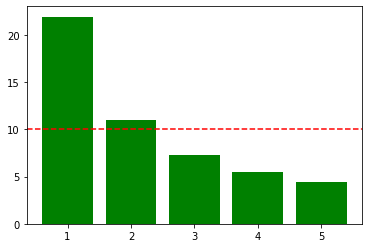

 6 competitors,  total prize pool = $ 60
payouts =$[24.49 12.24  8.16  6.12  4.9   4.08]
1st place = $24.49 , last place = $4.08


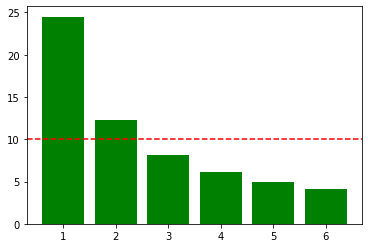

 7 competitors,  total prize pool = $ 70
payouts =$[27.   13.5   9.    6.75  5.4   4.5   3.86]
1st place = $27.00 , last place = $3.86


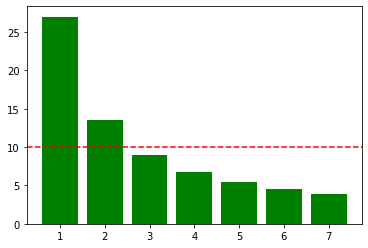

 8 competitors,  total prize pool = $ 80
payouts =$[29.43 14.72  9.81  7.36  5.89  4.91  4.2   3.68]
1st place = $29.43 , last place = $3.68


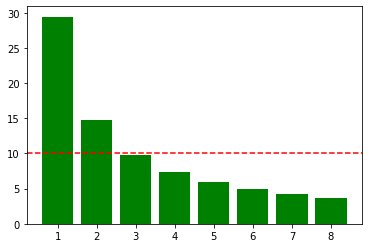

 9 competitors,  total prize pool = $ 90
payouts =$[31.81 15.91 10.6   7.95  6.36  5.3   4.54  3.98  3.53]
1st place = $31.81 , last place = $3.53


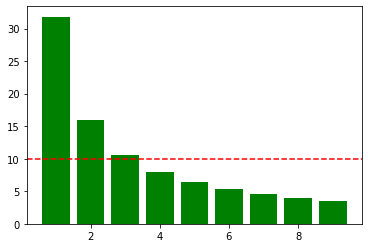

 10 competitors,  total prize pool = $ 100
payouts =$[34.14 17.07 11.38  8.54  6.83  5.69  4.88  4.27  3.79  3.41]
1st place = $34.14 , last place = $3.41


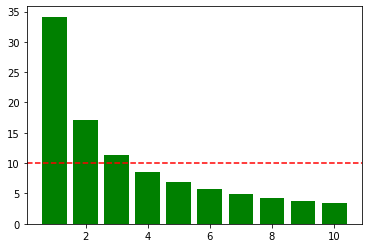

In [ ]:
#simulates fitness competition with varying number of competitors, and creates a payout schemes to distribute prize pool winnings to competitors based on rank. 
# current model uses the harmonic series (p=1) for more than 3 competitors.

import os, re, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

fee=10 # cost in ($) for each participant to "buy-in" to this competition

promopool=0 #additional marketing / promotional $$ added to competitor fees for grand pize competition pool

min=2 #min number of competitors to simulate (N)
max=10  #max number of competitors to simulate
step =1 #step size 

## Harmonic Series Parameter
# Denominator Quotient - default p = 1
# For p>1, more winnings will be paid to the top few competitors (capitalist), 
# As p --> 0, payouts become more uniform/evenly distributed to all competitors (communist) 
p=1

fig = plt.figure()
ax = plt.axes()  

for num in range(min,max+1,step): #loop over # of competitors participating in each competition

  tpool=(fee*num)+promopool #total competition prize pool    
  print(" %s competitors,"% num," total prize pool = $ %s" % tpool)

  x=np.arange(1,num+1,1) 
  
  if num<4:
    y=(x-num)/num #the result y contains relative weights of where the mass goes
  else:    
    y=(1)/(x ** p) #uses the harmonic series to introduce natural exponential decay. Change to (num-x)/(x) to set last place = $0. 

  y=y/sum(y) #normalize vector y to be |y| =1   
  y=y*tpool #scale directional vector y by the pool, so that payout distro sums to the prize pool  

  print("payouts =$%s"% y)

  #plt.plot(x, y, 'X', color='green')  
  plt.bar(x, y, color='green')
  plt.axhline(y = fee, color = 'r', linestyle = 'dashed')
  print("1st place = $%3.2f"%y[0],", last place = $%3.2f"  % y[len(y)-1])      

  plt.show()